In [131]:
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline

In [74]:
data_groups = pd.read_json('top100groups80491907_1070.json')

### Берем топ 5 групп по участникам

In [3]:
top5 = data_groups.sort_values(by = 'count', ascending = False).head(5)

In [4]:
print(top5)

    count        id                title
36    214  45441631     ПРИКОЛЫ | Смеяка
15    191  26419239    Смейся до слёз :D
69    165  23064236       Четкие Приколы
49    154  27895931  Новинки Музыки 2017
40    141  40567146              Лайфхак


Мы хотим видеть две гистограммы:
* распределение участников группы по возрастам
* распределение участников группы по полам

In [6]:
AUTORIZE_URL = 'https://oauth.vk.com/authorize'
APP_ID = 5977252
access_token = '27d4416d588badf79074b8aaca1bdd11dc8bca340fcc89ac7783fcd3806391c718b544418a2fbd4f7ebfa'

In [35]:
def import_data_users_per_group_id(group_id):
    params = {
        'group_id': group_id,
        'access_token': access_token,
        'v': 5.63,
        'count': 1000,
        'fields': 'sex, bdate'
    }

    response = requests.get('https://api.vk.com/method/groups.getMembers', params)
    result = response.json()
    result = result['response']['items']
    for user in result:
        if 'deactivated' in user.keys():
            del(user['deactivated'])
        if user['first_name'] is not None:
            del(user['first_name'])
        if user['last_name'] is not None:
            del(user['last_name'])
        if 'bdate' not in user.keys():
            user.setdefault('bdate')
    return result

In [160]:
list_all_users = []
for i in top5['id']:
    z = import_data_users_per_group_id(i)
    dict_all_users[i] = z
    list_all_users += z

users = list_all_users
users

[{'bdate': None, 'id': 79, 'sex': 2},
 {'bdate': None, 'id': 82, 'sex': 2},
 {'bdate': '7.9', 'id': 177, 'sex': 1},
 {'bdate': None, 'id': 219, 'sex': 2},
 {'bdate': '16.2.1987', 'id': 291, 'sex': 2},
 {'bdate': None, 'id': 332, 'sex': 2},
 {'bdate': '29.9.1995', 'id': 348, 'sex': 1},
 {'bdate': None, 'id': 349, 'sex': 1},
 {'bdate': None, 'id': 425, 'sex': 1},
 {'bdate': '14.11.1985', 'id': 431, 'sex': 1},
 {'bdate': '19.6.1986', 'id': 436, 'sex': 2},
 {'bdate': '23.4.1989', 'id': 479, 'sex': 1},
 {'bdate': None, 'id': 485, 'sex': 1},
 {'bdate': '17.6', 'id': 532, 'sex': 2},
 {'bdate': None, 'id': 669, 'sex': 2},
 {'bdate': None, 'id': 756, 'sex': 1},
 {'bdate': None, 'id': 817, 'sex': 2},
 {'bdate': None, 'id': 819, 'sex': 1},
 {'bdate': None, 'id': 853, 'sex': 2},
 {'bdate': '9.8.1990', 'id': 885, 'sex': 1},
 {'bdate': '11.12', 'id': 913, 'sex': 1},
 {'bdate': '20.5.1987', 'id': 914, 'sex': 2},
 {'bdate': '18.4.1986', 'id': 1112, 'sex': 1},
 {'bdate': None, 'id': 1132, 'sex': 1},
 {

In [162]:
users_for_pd = []
for user in users:
    users_for_pd.append({'id': user['id'], 'sex': user['sex']})
users_for_pd

[{'id': 79, 'sex': 2},
 {'id': 82, 'sex': 2},
 {'id': 177, 'sex': 1},
 {'id': 219, 'sex': 2},
 {'id': 291, 'sex': 2},
 {'id': 332, 'sex': 2},
 {'id': 348, 'sex': 1},
 {'id': 349, 'sex': 1},
 {'id': 425, 'sex': 1},
 {'id': 431, 'sex': 1},
 {'id': 436, 'sex': 2},
 {'id': 479, 'sex': 1},
 {'id': 485, 'sex': 1},
 {'id': 532, 'sex': 2},
 {'id': 669, 'sex': 2},
 {'id': 756, 'sex': 1},
 {'id': 817, 'sex': 2},
 {'id': 819, 'sex': 1},
 {'id': 853, 'sex': 2},
 {'id': 885, 'sex': 1},
 {'id': 913, 'sex': 1},
 {'id': 914, 'sex': 2},
 {'id': 1112, 'sex': 1},
 {'id': 1132, 'sex': 1},
 {'id': 1159, 'sex': 1},
 {'id': 1355, 'sex': 1},
 {'id': 1507, 'sex': 1},
 {'id': 1526, 'sex': 2},
 {'id': 1636, 'sex': 2},
 {'id': 1690, 'sex': 2},
 {'id': 1691, 'sex': 2},
 {'id': 1699, 'sex': 2},
 {'id': 1791, 'sex': 2},
 {'id': 1811, 'sex': 2},
 {'id': 1834, 'sex': 1},
 {'id': 1889, 'sex': 1},
 {'id': 1964, 'sex': 1},
 {'id': 2335, 'sex': 1},
 {'id': 2389, 'sex': 2},
 {'id': 2395, 'sex': 2},
 {'id': 2412, 'sex': 1},

In [163]:
users_pd = pd.DataFrame(users_for_pd)
users_pd = users_pd.replace(to_replace=[1, 2], value=['F', 'M'])
users_pd

,id,sex
0,79,M
1,82,M
2,177,F
3,219,M
4,291,M
5,332,M
6,348,F
7,349,F
8,425,F
9,431,F


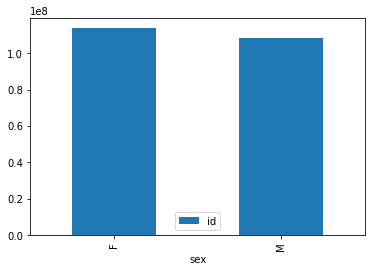

In [164]:
users_pd.groupby('sex').sum().plot.bar()

In [165]:
users_for_pd_bdate = []
for user in users:
    if user['bdate'] is not None:
        date_text = user['bdate']
        try:
            if date_text == datetime.strptime(date_text, "%d.%m.%Y").strftime('%d.%m.%Y'):
                users_for_pd_bdate.append({'id': user['id'], 'bdate': user['bdate']})
        except:
            pass
users_for_pd_bdate

[{'bdate': '14.11.1985', 'id': 431},
 {'bdate': '30.10.1980', 'id': 3186},
 {'bdate': '18.10.1993', 'id': 3756},
 {'bdate': '27.11.1985', 'id': 4043},
 {'bdate': '21.10.1988', 'id': 7639},
 {'bdate': '10.10.1985', 'id': 8247},
 {'bdate': '10.10.1988', 'id': 9993},
 {'bdate': '27.12.1982', 'id': 11983},
 {'bdate': '17.12.1987', 'id': 16755},
 {'bdate': '25.12.1965', 'id': 27062},
 {'bdate': '13.12.1988', 'id': 28910},
 {'bdate': '29.10.1987', 'id': 29131},
 {'bdate': '29.11.1995', 'id': 29481},
 {'bdate': '31.12.1987', 'id': 30632},
 {'bdate': '16.10.1984', 'id': 30812},
 {'bdate': '15.11.1987', 'id': 38042},
 {'bdate': '18.10.1988', 'id': 41815},
 {'bdate': '13.12.1985', 'id': 50225},
 {'bdate': '22.12.1986', 'id': 52638},
 {'bdate': '13.11.1978', 'id': 52990},
 {'bdate': '21.12.1988', 'id': 57210},
 {'bdate': '30.11.1986', 'id': 59551},
 {'bdate': '24.12.1988', 'id': 60113},
 {'bdate': '13.10.1987', 'id': 60197},
 {'bdate': '14.10.1985', 'id': 69511},
 {'bdate': '14.11.1986', 'id': 70

In [166]:
users_pd_bdate = pd.DataFrame(users_for_pd_bdate)
users_pd_bdate

,bdate,id
0,14.11.1985,431
1,30.10.1980,3186
2,18.10.1993,3756
3,27.11.1985,4043
4,21.10.1988,7639
5,10.10.1985,8247
6,10.10.1988,9993
7,27.12.1982,11983
8,17.12.1987,16755
9,25.12.1965,27062


In [167]:
users_pd_bdate.bdate = users_pd_bdate.bdate.apply(pd.to_datetime)
users_pd_bdate

,bdate,id
0,1985-11-14,431
1,1980-10-30,3186
2,1993-10-18,3756
3,1985-11-27,4043
4,1988-10-21,7639
5,1985-10-10,8247
6,1988-10-10,9993
7,1982-12-27,11983
8,1987-12-17,16755
9,1965-12-25,27062


In [168]:
now = datetime.strftime(datetime.now(), "%Y-%m-%d")
users_pd_bdate['now_date'] = now
users_pd_bdate.now_date = users_pd_bdate.now_date.apply(pd.to_datetime)
users_pd_bdate

,bdate,id,now_date
0,1985-11-14,431,2017-04-11
1,1980-10-30,3186,2017-04-11
2,1993-10-18,3756,2017-04-11
3,1985-11-27,4043,2017-04-11
4,1988-10-21,7639,2017-04-11
5,1985-10-10,8247,2017-04-11
6,1988-10-10,9993,2017-04-11
7,1982-12-27,11983,2017-04-11
8,1987-12-17,16755,2017-04-11
9,1965-12-25,27062,2017-04-11


In [169]:
users_pd_bdate['age'] = (users_pd_bdate['now_date'] - users_pd_bdate['bdate']).apply(lambda x: x/np.timedelta64(1,'D'))
users_pd_bdate

,bdate,id,now_date,age
0,1985-11-14,431,2017-04-11,11471.0
1,1980-10-30,3186,2017-04-11,13312.0
2,1993-10-18,3756,2017-04-11,8576.0
3,1985-11-27,4043,2017-04-11,11458.0
4,1988-10-21,7639,2017-04-11,10399.0
5,1985-10-10,8247,2017-04-11,11506.0
6,1988-10-10,9993,2017-04-11,10410.0
7,1982-12-27,11983,2017-04-11,12524.0
8,1987-12-17,16755,2017-04-11,10708.0
9,1965-12-25,27062,2017-04-11,18735.0


In [170]:
def formula_age(days):
    if days > 3640.0 & days < 5475.0:
        result = '10-15'
    elif 5476 < days < 7644:
        result = '16-21'
    elif 7645 < days < 10920:
        result = '22-30'
    elif 10921 < days < 14560:
        result = '31-40'
    elif 14561 < days < 29120:
        result = '41-80'
    elif  days > 29121:
        result = '80 и старше'
    return result

In [171]:
users_pd_bdate['age_category'] = formula_age(users_pd_bdate['age'])
users_pd_bdate

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]